### Partie 1 : apprentissage supervisé

In [216]:
import pandas as pd
import numpy as np 


In [217]:
malware = pd.read_csv("Microsoft_malware_dataset_min.csv")
malware.head(10)

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18
5,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,97
6,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,78
7,0,0.0,0.0,Core,1,1.0,0.0,1.0,rs1,97
8,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,164
9,1,1.0,0.0,CoreSingleLanguage,1,1.0,0.0,1.0,rs3,93


In [218]:
malware.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [219]:
malware.isnull().sum()

HasDetections                    0
Wdft_IsGamer                  3415
Census_IsVirtualDevice         185
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1076
SMode                         5932
IsProtected                    391
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

In [220]:
malware.shape

(100000, 10)

In [221]:
malware.describe()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000.000000,98924.000000,94068.000000,99609.000000,100000.000000
mean,0.499280,0.281607,0.006642,0.075850,0.977326,0.000351,0.944864,108.188050
std,0.500002,0.449785,0.081230,0.264759,0.148863,0.018727,0.228246,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


In [222]:
manquante = ['Wdft_IsGamer', 'Census_IsVirtualDevice', 'Firewall', 'SMode','IsProtected']
malware[manquante] = malware[manquante].fillna(malware[manquante].mean())

In [223]:
malware.isna().sum()

HasDetections                 0
Wdft_IsGamer                  0
Census_IsVirtualDevice        0
Census_OSEdition              0
Census_HasOpticalDiskDrive    0
Firewall                      0
SMode                         0
IsProtected                   0
OsPlatformSubRelease          0
CountryIdentifier             0
dtype: int64

In [224]:
from ydata_profiling import ProfileReport
profile = ProfileReport(malware)
profile.to_file('rapport_de_profilage.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [225]:
profile

In [226]:
malware.drop_duplicates(inplace=True)

In [227]:
catégorielle = ['Census_OSEdition', 'OsPlatformSubRelease']

# Appliquer l'encodage à chaud à toutes les colonnes catégorielles
malware_encoded = pd.get_dummies(malware, columns=catégorielle)
catégorielle

['Census_OSEdition', 'OsPlatformSubRelease']

 Préparez votre jeu de données pour la phase de modélisation

In [228]:
import plotly.express as px

fig = px.bar(malware, x="CountryIdentifier", y="Census_OSEdition", color="CountryIdentifier", height=300)
#fig.show()


In [248]:
catégorielles = ['Wdft_IsGamer', 'Census_IsVirtualDevice']
malware_encoded = pd.get_dummies(malware, columns=catégorielles)


In [246]:
X = malware_encoded.drop('CountryIdentifier', axis=1)  
y = malware_encoded['HasDetections']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [247]:
# Créez un modèle d'arbre de décision
tree_model = DecisionTreeClassifier(random_state=42)

# Entraînez le modèle sur l'ensemble d'entraînement
tree_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_prob = tree_model.predict_proba(X_test)[:, 1]


ValueError: could not convert string to float: 'Core'

In [243]:
# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Partie 2 : apprentissage non supervisé

In [253]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Suppression de la variable cible
#malware = malware.drop('OsPlatformSubRelease', axis=1)  

# Séparation des variables catégorielles et numériques
categorical_columns = malware.select_dtypes(include=['object']).columns
numeric_columns = malware.select_dtypes(include=['number']).columns


In [255]:
# Encodage one-hot des variables catégorielles
encoder = OneHotEncoder(drop='first', sparse=False)
malware_encoded = pd.concat([malware[numeric_columns],
                            pd.DataFrame(encoder.fit_transform(malware[categorical_columns]))],
                            axis=1)

# Convertir tous les noms de colonnes en chaînes
malware_encoded.columns = malware_encoded.columns.astype(str)

# Standardisation des variables
scaler = StandardScaler()
malware_scaled = pd.DataFrame(scaler.fit_transform(malware_encoded), columns=malware_encoded.columns)

# Afficher les premières lignes du DataFrame standardisé
print(malware_scaled.head())


   HasDetections  Wdft_IsGamer  Census_IsVirtualDevice  \
0      -0.938837     -0.721977               -0.158636   
1      -0.938837     -0.721977               -0.158636   
2      -0.938837     -0.721977               -0.158636   
3       1.065147     -0.721977               -0.158636   
4       1.065147     -0.721977               -0.158636   

   Census_HasOpticalDiskDrive  Firewall     SMode  IsProtected  \
0                   -0.470897  0.288326 -0.041215     0.464587   
1                   -0.470897  0.288326 -0.041215     0.464587   
2                   -0.470897  0.288326 -0.041215     0.464587   
3                   -0.470897  0.288326 -0.041215     0.464587   
4                   -0.470897  0.288326 -0.041215     0.464587   

   CountryIdentifier         0         1  ...         8         9        10  \
0          -1.285696 -0.753044 -0.114229  ... -0.095096 -0.017144  1.338712   
1          -0.268212 -0.753044 -0.114229  ... -0.095096 -0.017144  1.338712   
2          -0.379

C:\Users\Murielle\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [258]:
# Convertir tous les noms de colonnes en chaînes
malware_encoded.columns = malware_encoded.columns.astype(str)

# Imputation des valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')
malware_imputed = pd.DataFrame(imputer.fit_transform(malware_encoded), columns=malware_encoded.columns)

# Standardisation des variables
scaler = StandardScaler()
malware_scaled = pd.DataFrame(scaler.fit_transform(malware_imputed), columns=malware_imputed.columns)

# Appliquer K-means
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(malware_scaled)
    inertia_values.append(kmeans.inertia_)

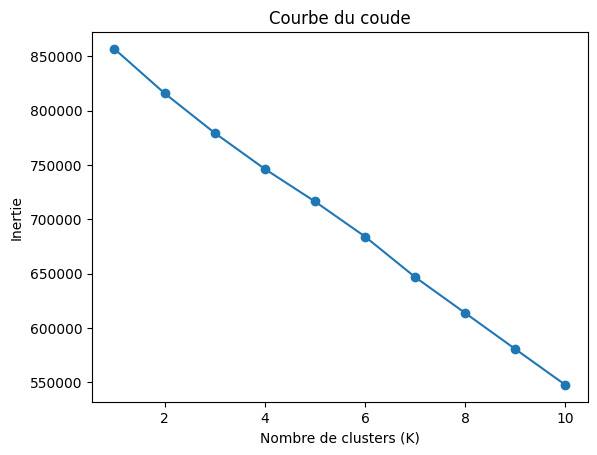

In [259]:
# Tracer la courbe du coude pour trouver le paramètre K optimal
plt.plot(k_values, inertia_values, marker='o')
plt.title('Courbe du coude')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')

# Ajouter cette ligne pour forcer l'affichage de la figure dans Jupyter Notebooks
%matplotlib inline

# Afficher la figure
plt.show()



In [263]:
# Appliquer K-means avec le K optimal
optimal_k = 3  
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
#malware['Cluster'] = kmeans_optimal.fit_predict(malware_scaled)


In [266]:
# Tracer les clusters dans l'espace bidimensionnel 
#sns.scatterplot(x=malware_scaled.iloc[:, 0], y=malware_scaled.iloc[:, 1], hue='Cluster', data=malware)
#plt.title('Clusters générés par K-means')
#plt.show()


In [175]:
# Interpréter les résultats 
cluster_summary = malware.groupby('Cluster').mean()
print(cluster_summary)


         HasDetections  Wdft_IsGamer  Census_IsVirtualDevice  \
Cluster                                                        
0             0.206413      0.072847                1.000000   
1             0.472198      0.328579                0.000069   
2             0.487561      0.360492                0.000000   

         Census_HasOpticalDiskDrive  Firewall     SMode  IsProtected  \
Cluster                                                                
0                          0.016032  0.875615  0.000022     0.958293   
1                          0.000000  0.918067  0.002043     0.805857   
2                          1.000000  0.955247  0.000038     0.881907   

         CountryIdentifier  
Cluster                     
0               104.621242  
1               110.102145  
2               109.563277  
